![imagen con dos cerebros enfrentados, el de la izquierda azul y el de la derecha naranja de los que salen ramificaciones](../img/img_cabecera.PNG)

# Exploración del dataset del comportamiento de personas introvertidas y extrovertidas

El objetivo de este trabajo es conocer cómo se comportan y qué datos caracterizan a las personas introvertidas y extrovertidas.

Los datos a analizar proceden de Kaggle. Su autor, Rakesh Kapilavayi, indica que los datos fueron recogidos de diferentes encuestas hechas con Google (*Google Forms*) para un proyecto de investigación universitario centrado en los rasgos de personalidad y en las tendencias de comportamiento de los estudiantes.

Es por ello que el nivel de granularidad es alto, ya que cada fila recoge las respuestas obtenidas por cada uno de ellos en cuanto a su comportamiento social y su personalidad.

La base de datos está formada por ocho columnas clasificadas en:
- **Columnas categóricas:**
    - **Stage_fear:** indica si tienen o no pánico escénico.
    - **Drained_after_socializing:** indica si después de socializar se quedan agotados o no. 
    - **Personality:** indica si su personalidad es introvertida o extrovertida. Se trata de la columna objetivo (*target*).

- **Columnas numéricas:**
    - **Time_spent_Alone:** tiempo que pasan solos al día.
    - **Social_event_attendance:** asistencia a eventos sociales.
    - **Going_outside:** frecuencia de salir fuera en una escala.
    - **Friends_circle_size:** número de amigos cercanos.
    - **Post_frequency:** frecuencia de publicar en redes sociales.

Este notebook se centra en la exploración inicial de datos, por lo tanto, la estructura a seguir será:

- 0. [Importación de librerías y carga de datos](#0-importación-librerías-y-carga-de-datos)
- 1. [Información básica de los datos](#1-información-básica-de-los-datos)
- 2. [Revisión de valores nulos y duplicados](#2-revisión-de-valores-nulos-y-duplicados)
    - 2.1 [Valores nulos](#21-valores-nulos)
    - 2.2 [Valores duplicados](#22-valores-duplicados)

### 0. Importación librerías y carga de datos

In [1]:
# Librerias necesarias:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append("..")

import src.transformaciones as tr
import src.visualizaciones as vs

Funciones ejecutadas correctamente


In [2]:
# Carga del csv:
df = pd.read_csv('../data/personality_dataset.csv')

### 1. Información básica de los datos

Para comenzar con en el análisis, es necesario revisar su estructura para saber cuántas observaciones lo componen y que tipo de variables se incluyen. Para ello, se utilizan los métodos shape e info, con los cuales obtenemos información sobre el número de filas y columnas, así como su tipo y la presencia de valores nulos.

De este modo, observamos que el dataset esta formado por 2900 filas y 8 columnas. Entre ellas encontramos tres variables categóricas de tipo *objeto* y 5 variables numéricas de tipo *floats*. Cabe destacar la existencia de nulos en todas las columnas a excepción de *Personality*.

In [3]:
df.shape

(2900, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


A continuación, se muestran las primeras filas del datset para familiarizarnos con los datos que se van a trabajar. También se procede a separar las variables en categóricas y numéricas, así como a identificar la columna objetivo, que permitirá, en análisis futuros, predecir la personalidad de una persona en base al resto de características.

In [5]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [6]:
target, numericas, categoricas = tr.clasificador_variables(df, 'Personality')

In [7]:
print(f'Columna objetivo: {target}')
print(f'Columnas numéricas: {numericas}')
print(f'Columnas categóricas: {categoricas}')

Columna objetivo: Personality
Columnas numéricas: ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
Columnas categóricas: ['Stage_fear', 'Drained_after_socializing']


Es necesario entender cómo se distribuyen las variables numéricas antes de llegar al análisis de comportamientos más complejos. Por lo que se utiliza el método *describe* para que nos proporcione información sobre la tendencia central (media y mediana), dispersión (desviación estándar), valores mínimos y máximos y los cuartiles que dividen la distribución.

De este modo, las principales conclusiones que obtenemos sobre dichas variables son las siguientes:
- **Time_spent_Alone**: su media(4.5) y mediana(4) presentan valores próximos por lo que no hay sesgo fuerte. Sin embargo, existe mucha variabilidad(3.48) por lo que el comportamiento de los individuos indica diferencias importantes.
- **Social_event_attendance**: presenta una distribución sesgada ligeramente a la derecha ya que la mediana(3) es menor que la media(3.96). También hay variabilidad(2.9), lo que indica la existencia de perfiles distintos en la muestra.
- **Going_outside**: tiene una distribución equilibrada(mediana = media) y con menor variabilidad que las anteriores ya que su desviación es de 2.24, por lo que el comportamiento hacia *salir fuera* es más uniforme.
- **Friends_circle_size**: existe sesgo positivo ya que la media(6.28) supera en mayor medida a la mediana(5). Su alta variabilidad(4.28) indica diferencias muy marcadas entre personas con círculos de amigos pequeños y grandes.
- **Post_frequency**: la mediana(3) es menor que la media(3.56), por lo que se obtiene un sesgo ligeramente positivo. La frecuencia de publicaciones es heterogénea(2.92), existiendo variabilidad a la hora de publicar.

Por lo tanto, destaca su gran variabilidad en todas las variables lo cual lo denota tanto su desviación estándar como sus rangos entre mínimos y máximos. A pesar de ello, gracias a los diagramas de caja se observa que no existe ningún valor atípico. En cuanto a su distribución, las variables presentan un ligero sesgo positivo a excepción de *Friends_circle_size* que muestra mayor sesgo hacia valores altos y *Going_outside* que tiene una distribución simétrica. Todo esto refleja la heterogeneidad de comportamientos sociales que se analizará con posterioridad.

In [8]:
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2837.000000,2838.000000,2834.000000,2823.000000,2835.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.479192,2.903827,2.247327,4.289693,2.926582
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.000000,3.000000,5.000000,3.000000
75%,8.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


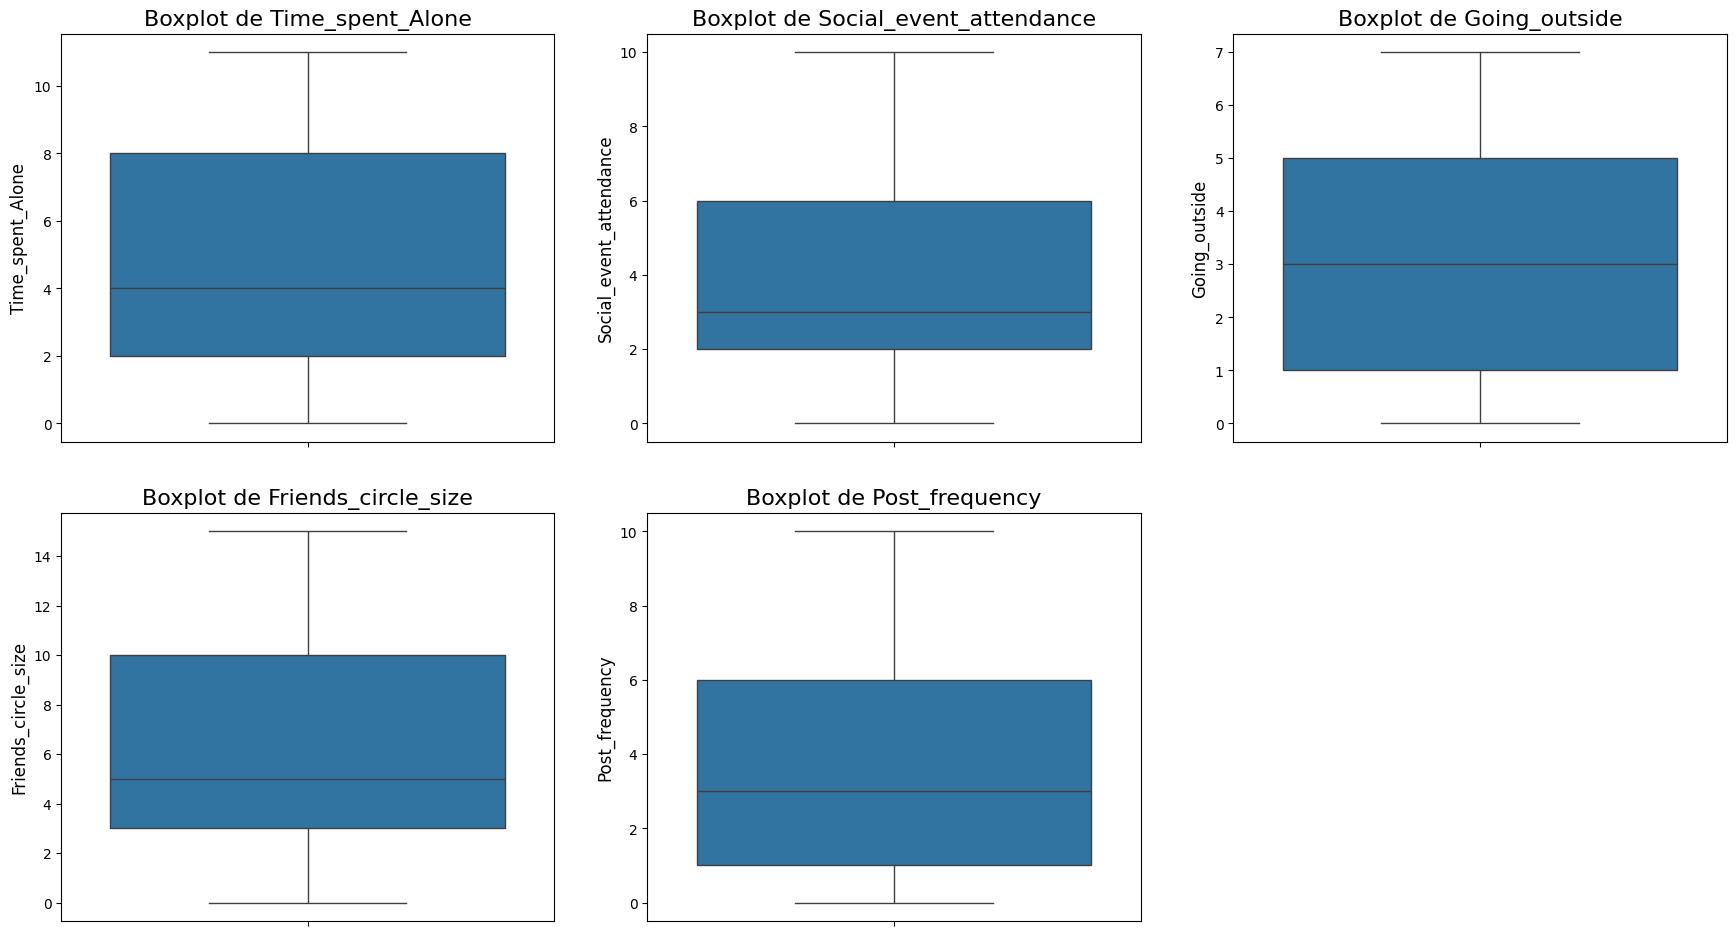

In [10]:
vs.boxplot_uni(df,numericas)

### 2. Revisión de valores nulos y duplicados

En este apartado nos centraremos en analizar la cantidad de nulos y duplicados y se decidirá si deben eliminarse, imputarse o dejarse sin modificar. Se trata de un paso clave que evita la existencia de sesgos, permitiendo que el análisis sea más fiable y facilitando la correcta visualización de los datos.

#### 2.1 Valores nulos

Antes de tomar una decisión sobre el tratamiento de los valores nulos, debemos contabilizarlos y obtener su porcentaje por columna. 

A excepción de la columna objetivo que no presenta ningún valor nulo, el resto de variables muestran bajos porcentajes,ninguno superior el 3%. Por lo tanto, se pueden eliminar dichas filas.

In [11]:
df.isna().sum()

Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64

In [12]:
(df.isna().mean()*100).round(2)

Time_spent_Alone             2.17
Stage_fear                   2.52
Social_event_attendance      2.14
Going_outside                2.28
Drained_after_socializing    1.79
Friends_circle_size          2.66
Post_frequency               2.24
Personality                  0.00
dtype: float64

#### 2.2 Valores duplicados

Al igual que en el caso anterior, también tenemos que tener en cuenta si existen filas duplicadas ya que su existencia provoca sesgos porque se pueden estar sobrerrepresentando ciertos valores y por ende, afecta a valores estadísticos como la media o la desviación estándar.

En este caso observamos que hay 388 duplicados, lo que supone un 13,38%. Sin embargo, cabe destacar que en este dataset no son duplicados realmente sino personas que en la encuesta han registrado los mismo datos que otros. Por lo tanto, eliminarlos implicaría la pérdida de registros válidos.

In [13]:
duplicados = df.duplicated().sum()
porcentaje_duplicados = ((duplicados/len(df))*100).round(2)

print(f'Cantidad de duplicados = {duplicados}')
print(f'Porcentaje de duplicados = {porcentaje_duplicados}')

Cantidad de duplicados = 388
Porcentaje de duplicados = 13.38


El siguiente paso  de este proyecto continúa en el nnotebook de ["transformación"](transformacion.ipynb), centrado en, como su nombre indica, las transformaciones necesarias antes de pasar al análisis.